In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  #for loading data in batches
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report  # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform=transforms.ToTensor()

In [3]:
train_data=datasets.MNIST(root='/content/sample_data',train=True,download=True,transform=transform)
train_data

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15795030.64it/s]


Extracting /content/sample_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 489650.81it/s]


Extracting /content/sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4396918.67it/s]


Extracting /content/sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2753364.47it/s]

Extracting /content/sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/sample_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data=datasets.MNIST(root='/content/sample_data',train=False,download=True,transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/sample_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
image,label=train_data[0]
print('Shape:',image.shape,'\nLabel:',label)

Shape: torch.Size([1, 28, 28]) 
Label: 5


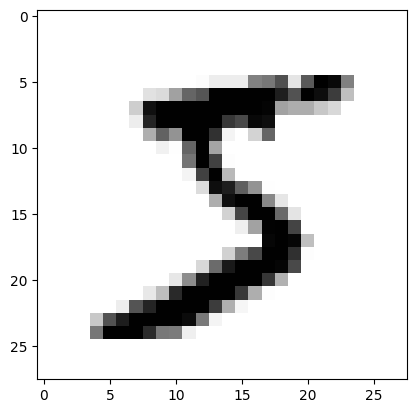

In [7]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="gist_yarg");

In [8]:
#Our training set has 60,000 records.
#Our model has 784 incoming features(once we flatten the incoming 28x28 tensors),
#Hidden layers of 120 and 84 neurons,
#10 output features.

In [9]:
#batch_size is the no. of records to be processed at a time.
#if not evenly divisible into dataset then the final batch contains remainder.
#shuffle set to True means dataset will be shuffled after each epoch.

In [10]:
torch.manual_seed(101)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


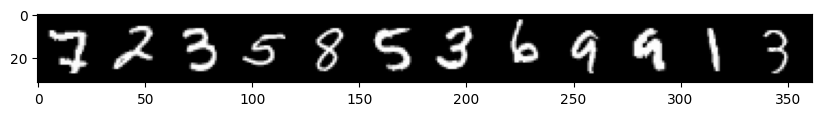

In [11]:
#viewing a grid of images using torchvision.utils.make_grid
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # to widen the printed array

# Grab the first batch of images
for images,labels in train_loader:
    break

# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [12]:
#Model
#we will use fully connected layers to develop a multilayer perceptron.
#Our input size is 784 once we flatten the incoming 28x28 tensors.
#Our output size represents the 10 possible digits.
#We'll set our hidden layers to [120, 84].

In [27]:
#USING ANN

In [13]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)

    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [14]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [15]:
#loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [16]:
# Load the first batch, print its shape
for images, labels in train_loader:
    print('Batch shape:', images.size())
    break

Batch shape: torch.Size([100, 1, 28, 28])


In [17]:
#We can flatten them using .view()
images.view(100,-1).size()

torch.Size([100, 784])

In [18]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1

        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')

    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.29955006  accuracy:  82.655%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.27258992  accuracy:  87.248%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.18150842  accuracy:  89.318%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.17044601  accuracy:  94.610%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.05073734  accuracy:  95.010%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.14283668  accuracy:  95.250%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.16775088  accuracy:  96.520%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.17148611  accuracy:  96.500%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.10836818  accuracy:  96.580%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.14083403  accuracy:  97.435%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.01265545  accuracy:  97.480%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.07461330  accuracy:  97.413%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.05512386  accuracy:  98.025%
epoch:  4  b

In [21]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(9453), tensor(9604), tensor(9657), tensor(9723), tensor(9648), tensor(9754), tensor(9742), tensor(9757), tensor(9746), tensor(9777)]

Test accuracy: 97.770%


In [22]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [23]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9777/10000 =  97.770%


In [24]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 972    0    2    1    1    2    3    0    3    5]
 [   0 1121    0    0    0    1    3    6    0    1]
 [   2    4 1020   10    3    0    3   12    3    0]
 [   0    3    2  986    0   16    1    2    2    9]
 [   0    0    1    0  958    1    4    1    2    9]
 [   0    0    0    3    0  854    2    0    2    4]
 [   3    2    2    0    5    8  941    0    3    1]
 [   0    1    2    3    2    1    0 1000    4    3]
 [   3    4    2    5    2    8    1    3  953    5]
 [   0    0    1    2   11    1    0    4    2  972]]


In [25]:
print(classification_report(predicted.view(-1), y_test.view(-1)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       989
           1       0.99      0.99      0.99      1132
           2       0.99      0.96      0.98      1057
           3       0.98      0.97      0.97      1021
           4       0.98      0.98      0.98       976
           5       0.96      0.99      0.97       865
           6       0.98      0.98      0.98       965
           7       0.97      0.98      0.98      1016
           8       0.98      0.97      0.97       986
           9       0.96      0.98      0.97       993

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [26]:
#Classification report displays precision,recall,F1-score and support scores.
#precision=accuracy of positive predictions=(true positives)/(true positives + false positives)
#recall=fraction of positives that were corectly identified=(true positives)/(true positives + false negatives)
#F1 score=weighted harmonic mean of precision and recall=(2*precision*recall)/(precision+recall)
#support=no. of actual occurences of the class in the specified dataset

In [28]:
#USING CNN

In [29]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [30]:
#In the ANN Model,we used only fully connected layers,
#with an input layer of 784 (our flattened 28x28 images),
#hidden layers of 120 and 84 neurons,
#and an output size representing 10 possible digits.

#In CNN Model,we will employ two convolutional layers and two pooling layers
#before feeding data through fully connected hidden layers to our output.
#The model follows CONV/RELU/POOL/CONV/RELU/POOL/FC/RELU/FC.

In [31]:
'''
The parameters for the nn.Conv2d function in PyTorch are as follows:

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
Here's a detailed breakdown of each parameter:

in_channels: (int) Number of channels in the input image. For grayscale images, this is 1. For RGB images, this would be 3.
out_channels: (int) Number of channels produced by the convolution. This is the number of filters you want to apply, which determines the depth of the output feature maps.
kernel_size: (int or tuple) Size of the convolving kernel (filter). If an integer is given, the same size is used for both dimensions. If a tuple, it specifies the height and width of the filter.
stride: (int or tuple, optional) Stride of the convolution. Default is 1. This parameter controls how the filter moves over the input image.
padding: (int, tuple or str, optional) Zero-padding added to both sides of the input. Default is 0. Padding can help maintain the spatial dimensions of the input.
dilation: (int or tuple, optional) Spacing between kernel elements. Default is 1. This parameter is used to increase the receptive field of the kernel.
groups: (int, optional) Number of blocked connections from input channels to output channels. Default is 1. If groups is greater than 1, the convolution is a grouped convolution, which means the input and output channels are divided into groups.
bias: (bool, optional) If True, adds a learnable bias to the output. Default is True.
padding_mode: (str, optional) 'zeros', 'reflect', 'replicate' or 'circular'. Default is 'zeros'. It specifies the type of padding to use.
Given the example:

self.conv1 = nn.Conv2d(1, 6, 3, 1)
self.conv2 = nn.Conv2d(6, 16, 3, 1)
The parameters for self.conv1 are:

in_channels: 1 (input is a grayscale image with one channel)
out_channels: 6 (six filters will be applied, producing six output feature maps)
kernel_size: 3 (3x3 filter)
stride: 1 (filter moves one pixel at a time)
The parameters for self.conv2 are:

in_channels: 6 (input to this layer is the output from the previous layer, which has six channels)
out_channels: 16 (sixteen filters will be applied, producing sixteen output feature maps)
kernel_size: 3 (3x3 filter)
stride: 1 (filter moves one pixel at a time)
If you want to explicitly name all parameters:
self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1)
self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)
'''

"\nThe parameters for the nn.Conv2d function in PyTorch are as follows:\n\ntorch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')\nHere's a detailed breakdown of each parameter:\n\nin_channels: (int) Number of channels in the input image. For grayscale images, this is 1. For RGB images, this would be 3.\nout_channels: (int) Number of channels produced by the convolution. This is the number of filters you want to apply, which determines the depth of the output feature maps.\nkernel_size: (int or tuple) Size of the convolving kernel (filter). If an integer is given, the same size is used for both dimensions. If a tuple, it specifies the height and width of the filter.\nstride: (int or tuple, optional) Stride of the convolution. Default is 1. This parameter controls how the filter moves over the input image.\npadding: (int, tuple or str, optional) Zero-padding added to both sides of the input. Default is 0. Paddi

In [32]:
'''
STEPS IN CNN Model:
Extend the base Module class:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()

Set up the convolutional layers with torch.nn.Conv2d()

The first layer has one input channel (the grayscale color channel). We'll assign 6 output channels for feature extraction. We'll set our kernel size to 3 to make a 3x3 filter, and set the step size to 1.
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
The second layer will take our 6 input channels and deliver 16 output channels.
    self.conv2 = nn.Conv2d(6, 16, 3, 1)


Set up the fully connected layers with torch.nn.Linear().

The input size of (5x5x16) is determined by the effect of our kernels on the input image size. A 3x3 filter applied to a 28x28 image leaves a 1-pixel edge on all four sides. In one layer the size changes from 28x28 to 26x26. We could address this with zero-padding, but since an MNIST image is mostly black at the edges, we should be safe ignoring these pixels. We'll apply the kernel twice, and apply pooling layers twice, so our resulting output will be
(((28-2)/2)-2)/2 = 5.5 which rounds down to 5 pixels per side.
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

Define the forward method.

Activations can be applied to the convolutions in one line using F.relu() and pooling is done using F.max_pool2d()
def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)
Flatten the data for the fully connected layers:
    X = X.view(-1, 5*5*16)
    X = F.relu(self.fc1(X))
    X = self.fc2(X)
    return F.log_softmax(X, dim=1)
'''

"\nSTEPS IN CNN Model:\nExtend the base Module class:\nclass ConvolutionalNetwork(nn.Module):\n    def __init__(self):\n        super().__init__()\n\nSet up the convolutional layers with torch.nn.Conv2d()\n\nThe first layer has one input channel (the grayscale color channel). We'll assign 6 output channels for feature extraction. We'll set our kernel size to 3 to make a 3x3 filter, and set the step size to 1.\n    self.conv1 = nn.Conv2d(1, 6, 3, 1)\nThe second layer will take our 6 input channels and deliver 16 output channels.\n    self.conv2 = nn.Conv2d(6, 16, 3, 1)\n\n\nSet up the fully connected layers with torch.nn.Linear().\n\nThe input size of (5x5x16) is determined by the effect of our kernels on the input image size. A 3x3 filter applied to a 28x28 image leaves a 1-pixel edge on all four sides. In one layer the size changes from 28x28 to 26x26. We could address this with zero-padding, but since an MNIST image is mostly black at the edges, we should be safe ignoring these pixel

In [33]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [34]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [35]:
#using loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [36]:
#training the model
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1

        # Apply the model
        y_pred = model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  600 [  6000/60000]  loss: 0.04055627  accuracy:  78.417%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.08253475  accuracy:  85.800%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.36470491  accuracy:  88.689%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.01825025  accuracy:  90.525%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.00806704  accuracy:  91.650%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.00116694  accuracy:  92.503%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.52552539  accuracy:  93.152%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.03260820  accuracy:  93.617%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.00746816  accuracy:  94.028%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.03889676  accuracy:  94.340%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.03282820  accuracy:  97.817%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.04554177  accuracy:  97.867%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.00578480  accuracy:  97.939%
epoch:  1  b

In [37]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [38]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9889/10000 =  98.890%


In [39]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 977    3    1    0    0    2    4    1    4    0]
 [   0 1130    2    0    0    0    1    4    0    3]
 [   0    1 1022    0    0    0    0    4    2    0]
 [   0    0    3 1007    0    7    0    2    2    2]
 [   0    0    1    0  971    0    1    0    0    5]
 [   0    0    0    1    0  879    7    0    1    5]
 [   1    1    0    0    4    2  944    0    1    0]
 [   1    0    3    0    0    0    0 1013    1    2]
 [   1    0    0    2    1    1    1    1  962    8]
 [   0    0    0    0    6    1    0    3    1  984]]


In [40]:
print(classification_report(predicted.view(-1), y_test.view(-1)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       992
           1       1.00      0.99      0.99      1140
           2       0.99      0.99      0.99      1029
           3       1.00      0.98      0.99      1023
           4       0.99      0.99      0.99       978
           5       0.99      0.98      0.98       893
           6       0.99      0.99      0.99       953
           7       0.99      0.99      0.99      1020
           8       0.99      0.98      0.99       977
           9       0.98      0.99      0.98       995

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



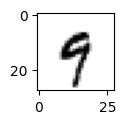

In [41]:
x = 2019
plt.figure(figsize=(1,1))
plt.imshow(test_data[x][0].reshape((28,28)), cmap="gist_yarg");

In [42]:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[x][0].view(1,1,28,28)).argmax()
print("Predicted value:",new_pred.item())

Predicted value: 9


In [ ]:
#ABOVE THE CNN MODEL MADE CORRECT PREDICTION.